In [3]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

According to the Kaggle project information, this dataset has already been cleaned, however we can still do some check to make sure it is actually clean.

In [8]:
file_path = "../data/diabetes_012_health_indicators_BRFSS2015.csv"
df = pd.read_csv(file_path)

In [9]:
print(df.head())

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

In [11]:
print(df.describe())

        Diabetes_012         HighBP       HighChol      CholCheck  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.296921       0.429001       0.424121       0.962670   
std         0.698160       0.494934       0.494210       0.189571   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       1.000000   
50%         0.000000       0.000000       0.000000       1.000000   
75%         0.000000       1.000000       1.000000       1.000000   
max         2.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  253680.000000  253680.000000  253680.000000         253680.000000   
mean       28.382364       0.443169       0.040571              0.094186   
std         6.608694       0.496761       0.197294              0.292087   
min        12.000000       0.000000       0.000000              0.000000  

In [13]:
# Check missing values
print(df.isnull().sum())

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


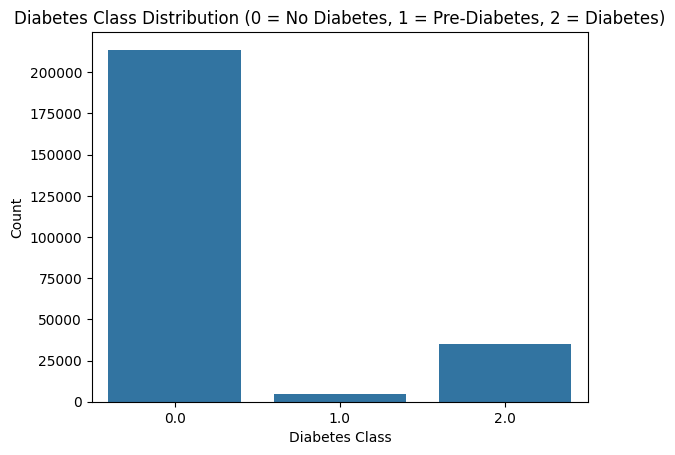

In [15]:
sns.countplot(data=df, x="Diabetes_012")
plt.title("Diabetes Class Distribution (0 = No Diabetes, 1 = Pre-Diabetes, 2 = Diabetes)")
plt.xlabel("Diabetes Class")
plt.ylabel("Count")
plt.show()

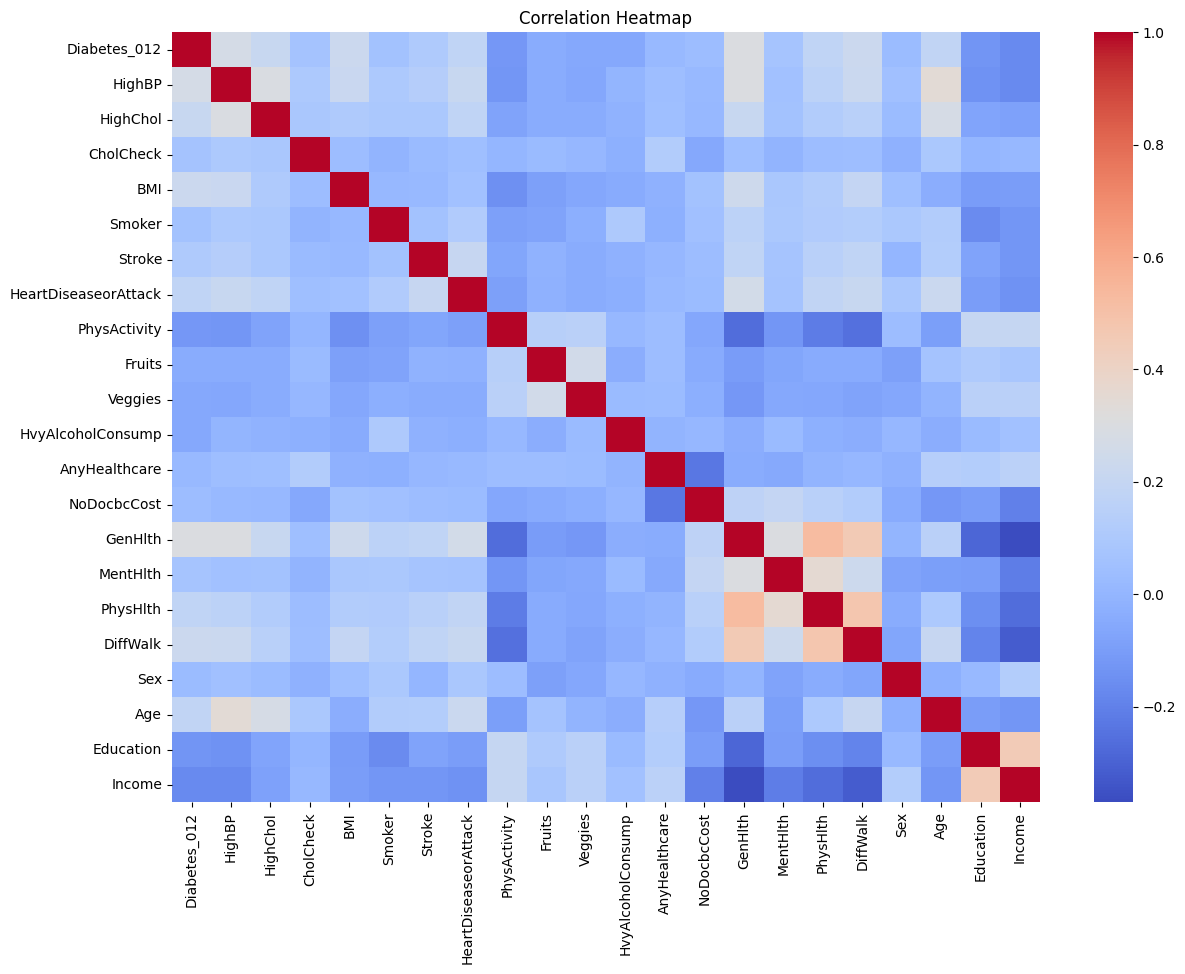

In [16]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# The correlation heatmap shows some strong correlation between PhysHlth and Genhlth, we may want to combine these predictors
# There is also a correlation between education and income, we may want to remove one of those predictors
# DiffWalk and PhysHlth could be combined
# DiffWalk and GenHlth could be combined

In [19]:
# Drop duplicate rows
before_row_number = df.shape[0]
df.drop_duplicates(inplace=True)
aftern_row_number = df.shape[0]
print(f"Dropped {before_row_number - aftern_row_number} duplicate rows.")

Dropped 0 duplicate rows.


In [22]:
# Saved cleaned dataset as another csv for the model step to use
cleaned_file_path = "../data/cleaned_diabetes_health_indicators_dataset.csv"
df.to_csv(cleaned_file_path, index=False)
print(f"Cleaned data saved to: {cleaned_file_path}")

Cleaned data saved to: ../data/cleaned_diabetes_health_indicators_dataset.csv
